In [345]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
df = pd.read_csv('music.csv')

In [4]:
df_bkp = df.copy(deep=True)

In [5]:
df.set_index(df.Index, inplace = True)
df.drop('Index', axis = 1, inplace = True)

### I. DATA CLEANING

#### Filter Marking to find non-numeric rows

In [10]:
df[df['Artist Followers'].apply(lambda x: not x.isnumeric())]

,Highest Charting Position,Number of Times Charted,Week of Highest Charting,Song Name,Streams,Artist,Artist Followers,Song ID,Genre,Release Date,...,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence,Chord
Index,,,,,,,,,,,,,,,,,,,,,
36,36,1,2021-07-23--2021-07-30,NOT SOBER (feat. Polo G & Stunna Gambino),"11,869,336",The Kid LAROI,,,,,...,,,,,,,,,,
164,5,39,2020-10-30--2020-11-06,34+35,"5,453,159",Ariana Grande,,,,,...,,,,,,,,,,
465,118,1,2021-03-26--2021-04-02,Richer (feat. Polo G),"6,292,362",Rod Wave,,,,,...,,,,,,,,,,
531,20,5,2021-01-15--2021-01-22,"34+35 Remix (feat. Doja Cat, Megan Thee Stalli...","6,162,453",Ariana Grande,,,,,...,,,,,,,,,,
637,22,6,2020-12-18--2020-12-25,Driving Home for Christmas - 2019 Remaster,"8,804,531",Chris Rea,,,,,...,,,,,,,,,,
655,73,1,2020-12-18--2020-12-25,Thank God It's Christmas - Non-Album Single,"10,509,961",Queen,,,,,...,,,,,,,,,,
751,19,20,2020-07-31--2020-08-07,"Agua (with J Balvin) - Music From ""Sponge On T...","5,358,940",Tainy,,,,,...,,,,,,,,,,
785,76,14,2020-09-04--2020-09-11,"Lean (feat. Towy, Osquel, Beltito & Sammy & Fa...","4,739,241","Super Yei, Jone Quest",,,,,...,,,,,,,,,,
877,164,4,2020-09-18--2020-09-25,#NAME?,"4,964,708",Dalex,,,,,...,,,,,,,,,,


#### Create a new df
It is observed that the 11 rows above are all containing non-numeric data for the other columns
hence a new dataframe is created to only contain numeric data for these columns

In [6]:
df2 = df[df['Artist Followers'].apply(lambda x: x.isnumeric())]

Checking that there is no non-numeric data:

In [7]:
lst = ['Artist Followers', 'Popularity','Duration (ms)']
df2[df2[lst[2]].apply(lambda x: not x.isnumeric())]

,Highest Charting Position,Number of Times Charted,Week of Highest Charting,Song Name,Streams,Artist,Artist Followers,Song ID,Genre,Release Date,...,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence,Chord
Index,,,,,,,,,,,,,,,,,,,,,


In [8]:
df2.columns

Index(['Highest Charting Position', 'Number of Times Charted',
       'Week of Highest Charting', 'Song Name', 'Streams', 'Artist',
       'Artist Followers', 'Song ID', 'Genre', 'Release Date', 'Weeks Charted',
       'Popularity', 'Danceability', 'Energy', 'Loudness', 'Speechiness',
       'Acousticness', 'Liveness', 'Tempo', 'Duration (ms)', 'Valence',
       'Chord'],
      dtype='object')

From the original data, Streams has numeric values with thousands separator "," <br>
This cause astype() unable to convert to int64 <br>
Hence, replace it with a blank space <br>

In [9]:
df2['Streams'] = df['Streams'].str.replace(',', '').astype('int64')

<ipython-input-9-233e09123cbb>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Streams'] = df['Streams'].str.replace(',', '').astype('int64')


Checking the Column Stream <br>
Note that there are 1545 rows (11 less than original)

In [10]:
df2['Streams']

Index
1       48633449
2       47248719
3       40162559
4       37799456
5       33948454
          ...   
1552     4630675
1553     4623030
1554     4620876
1555     4607385
1556     4595450
Name: Streams, Length: 1545, dtype: int64

It can be seen that many columns are of incorrect data types <br>
Converting columns into correct data types:

In [16]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1545 entries, 1 to 1556
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Highest Charting Position  1545 non-null   int64 
 1   Number of Times Charted    1545 non-null   int64 
 2   Week of Highest Charting   1545 non-null   object
 3   Song Name                  1545 non-null   object
 4   Streams                    1545 non-null   int64 
 5   Artist                     1545 non-null   object
 6   Artist Followers           1545 non-null   object
 7   Song ID                    1545 non-null   object
 8   Genre                      1470 non-null   object
 9   Release Date               1545 non-null   object
 10  Weeks Charted              1545 non-null   object
 11  Popularity                 1545 non-null   object
 12  Danceability               1545 non-null   object
 13  Energy                     1545 non-null   object
 14  Loudness

In [11]:
for col in ['Artist Followers', 'Popularity','Duration (ms)']:
    df2[col] = df2[col].astype('int64')

for col in ['Danceability', 'Energy', 'Loudness', 'Speechiness',
       'Acousticness', 'Liveness', 'Tempo', 'Valence']:
    df2[col] = df2[col].astype('float64')
 

<ipython-input-11-1e4e638e59d0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[col] = df2[col].astype('int64')
<ipython-input-11-1e4e638e59d0>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[col] = df2[col].astype('float64')


Check that columns are in correct data types, the data frame is ready for analysis

In [31]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1545 entries, 1 to 1556
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Highest Charting Position  1545 non-null   int64  
 1   Number of Times Charted    1545 non-null   int64  
 2   Week of Highest Charting   1545 non-null   object 
 3   Song Name                  1545 non-null   object 
 4   Streams                    1545 non-null   int64  
 5   Artist                     1545 non-null   object 
 6   Artist Followers           1545 non-null   int64  
 7   Song ID                    1545 non-null   object 
 8   Genre                      1470 non-null   object 
 9   Release Date               1545 non-null   object 
 10  Weeks Charted              1545 non-null   object 
 11  Popularity                 1545 non-null   int64  
 12  Danceability               1545 non-null   float64
 13  Energy                     1545 non-null   float

### I. DATA ANALYSIS

### Question 3.31 (12 marks)

In this question, you need to visualize the information below:

1. Get the top 10 artists by the number of followers in descending order. Ticks on horizontal axis should be the name of the artists.<br>
2. The total number of streams for each of the 10 artists selected in step 1.<br>
3. Highlight those artists whose total number of streams is also among the top 10 if ranked by the total number of streams in descending order. You should not highlight their name labels (in horizontal ticks) but highlight inside the chart.<br>

For simplicity, we only analyze songs with **exactly one** artist. <br>
i.e. for song "Qué Más Pues?" with ID="6hf0RpxTbOprT5nnwzkk8e", since it is performed by two artists, "J Balvin, Maria Becerra", it will be excluded from this analysis.

#### 1. Create a smaller dataframe for the task. containing only the 3 relevant columns

In [395]:
df_fol = df2[['Artist','Artist Followers','Streams']]

In [396]:
df_fol.head()

,Artist,Artist Followers,Streams
Index,,,
1,Måneskin,3377762,48633449
2,The Kid LAROI,2230022,47248719
3,Olivia Rodrigo,6266514,40162559
4,Ed Sheeran,83293380,37799456
5,Lil Nas X,5473565,33948454


#### 2. Calculate the total streams by each artist and followers

In [14]:
df_fol = df_fol.groupby(['Artist','Artist Followers'])['Streams'].sum().reset_index()

In [15]:
#2.1 Inspecting the results in step 2:
df_fol.sort_values('Artist Followers',ascending = False)
# there are multiple amounts of followers, due to different recorded time
# we neeed to get the highest number of followers, while summing the streams of all the tracks by each artist

,Artist,Artist Followers,Streams
235,Ed Sheeran,83337783,25084525
234,Ed Sheeran,83293380,50530713
44,Ariana Grande,67208170,109435851
43,Ariana Grande,67158068,12247080
220,Drake,56327031,110648683
...,...,...,...
707,StarBoi3,17202,5258628
54,BANDIDO,16074,6709106
494,Mari Fernandez,15889,5652272
601,"Petter Ferraz, Menor Nico",14122,4848222


#### 3. Find the max (most updated) number of followers and put into a new col

In [16]:
df_fol[['Followers_Updated']]=df_fol.groupby('Artist')['Artist Followers'].transform('max')
df_fol.sort_values('Artist Followers',ascending = False)

,Artist,Artist Followers,Streams,Followers_Updated
235,Ed Sheeran,83337783,25084525,83337783
234,Ed Sheeran,83293380,50530713,83337783
44,Ariana Grande,67208170,109435851,67208170
43,Ariana Grande,67158068,12247080,67208170
220,Drake,56327031,110648683,56327031
...,...,...,...,...
707,StarBoi3,17202,5258628,17202
54,BANDIDO,16074,6709106,16074
494,Mari Fernandez,15889,5652272,15889
601,"Petter Ferraz, Menor Nico",14122,4848222,14122


#### 4. Sum the streams and put into a new col

In [17]:
df_fol[['Streams_Updated']]=df_fol.groupby('Artist')['Streams'].transform('sum')
df_fol.sort_values('Artist Followers',ascending = False)

,Artist,Artist Followers,Streams,Followers_Updated,Streams_Updated
235,Ed Sheeran,83337783,25084525,83337783,80580568
234,Ed Sheeran,83293380,50530713,83337783,80580568
44,Ariana Grande,67208170,109435851,67208170,121682931
43,Ariana Grande,67158068,12247080,67208170,121682931
220,Drake,56327031,110648683,56327031,128538281
...,...,...,...,...,...
707,StarBoi3,17202,5258628,17202,5258628
54,BANDIDO,16074,6709106,16074,6709106
494,Mari Fernandez,15889,5652272,15889,5652272
601,"Petter Ferraz, Menor Nico",14122,4848222,14122,4848222


##### 4.1 Inspecting the results in step 4: 

- Now each artist only have 1 unique number of followers and 1 unique value of total streams <br>
- We can proceed to take out these 3 columns and get the unique rows by artists

In [18]:
df_fol2 = df_fol[['Artist','Followers_Updated','Streams_Updated']]
df_fol2.drop_duplicates('Artist', inplace = True)
df_fol2.reset_index
df_fol2

<ipython-input-18-abd015ae0fcf>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fol2.drop_duplicates('Artist', inplace = True)


,Artist,Followers_Updated,Streams_Updated
0,*NSYNC,1564750,6635128
1,"13 Organisé, SCH, Kofs, Jul, Naps, Soso Maness...",249910,5112572
2,"187 Strassenbande, Bonez MC, Frauenarzt",1223734,5203700
3,"21 Savage, Metro Boomin",9949044,73502663
4,24kGoldn,1276406,25117823
...,...,...,...
811,iann dior,1276292,4571916
812,jxdn,799682,4435538
813,salem ilese,133998,5436450
814,sangiovanni,384097,4973063


##### 4.2 Inspecting the results from 4.1

- We can see that artists can be in group, they will not be included as per requirement <br> 
- We need to remove rows with more than 1 artist, based on the presence of the special char ","

In [19]:
df_fol2.sort_values('Followers_Updated', ascending = False).head(20)


,Artist,Followers_Updated,Streams_Updated
233,Ed Sheeran,83337783,80580568
43,Ariana Grande,67208170,121682931
219,Drake,56327031,128538281
257,"Future, Drake, Young Thug",56327031,10537097
221,"Drake, WizKid, Kyla",56308172,5178490
368,"Justin Bieber, Quavo",48544923,28509534
367,"Justin Bieber, Kehlani",48544923,5236560
364,Justin Bieber,48544923,225842427
101,Billie Eilish,47061119,97575714
242,Eminem,46814751,162935796


Artists in groups separated by comma and removed are listed bellow FYR:

In [20]:

df_fol2[df_fol2['Artist'].str.contains(r'[,]')].sort_values(['Followers_Updated'], ascending = False)

,Artist,Followers_Updated,Streams_Updated
257,"Future, Drake, Young Thug",56327031,10537097
221,"Drake, WizKid, Kyla",56308172,5178490
367,"Justin Bieber, Kehlani",48544923,5236560
368,"Justin Bieber, Quavo",48544923,28509534
71,"Bad Bunny, Gabriela",36177712,5364262
...,...,...,...
524,"Miksu / Macloud, Summer Cem, Luciano, Jamule",30683,5415994
747,"Thiaguinho MT, Mila, JS o Mão de Ouro",28017,5510844
527,"Milly, Farruko, Nio Garcia, Jay Wheeler, Amenazzy",22718,5218146
374,"Justin Wellington, Small Jam",18228,7381585


#### 5. Applying boolean masking with specification == False, we create a new DF containing only single artists

In [84]:
df_fol3 = df_fol2.loc[df_fol2['Artist'].str.contains(r'[,]') == False].sort_values(['Followers_Updated'], ascending = False)

In [85]:
df_fol3

,Artist,Followers_Updated,Streams_Updated
233,Ed Sheeran,83337783,80580568
43,Ariana Grande,67208170,121682931
219,Drake,56327031,128538281
364,Justin Bieber,48544923,225842427
101,Billie Eilish,47061119,97575714
...,...,...,...
118,Bobby Helms,20637,16527404
707,StarBoi3,17202,5258628
54,BANDIDO,16074,6709106
494,Mari Fernandez,15889,5652272


#### 6. Rename the columns to the original names in the oroginal dataframe

In [86]:
df_fol3 = df_fol3.rename(columns={'Followers_Updated': 'Artist Followers', 'Streams_Updated': 'Streams'})

In [88]:
df_fol3

,Artist,Artist Followers,Streams
233,Ed Sheeran,83337783,80580568
43,Ariana Grande,67208170,121682931
219,Drake,56327031,128538281
364,Justin Bieber,48544923,225842427
101,Billie Eilish,47061119,97575714
...,...,...,...
118,Bobby Helms,20637,16527404
707,StarBoi3,17202,5258628
54,BANDIDO,16074,6709106
494,Mari Fernandez,15889,5652272


#### 7. Obtain the top 10 by Followers using iloc, as the previous df is already sorted by followers

In [89]:
df_top10f = df_fol3.iloc[0:10]

In [90]:
df_top10f

,Artist,Artist Followers,Streams
233,Ed Sheeran,83337783,80580568
43,Ariana Grande,67208170,121682931
219,Drake,56327031,128538281
364,Justin Bieber,48544923,225842427
101,Billie Eilish,47061119,97575714
242,Eminem,46814751,162935796
728,Taylor Swift,42227614,381480455
61,BTS,37151476,238400020
767,Trio Vegabajeño,36177712,5842320
64,Bad Bunny,36177712,203813133


#### 8. Create another DF to sort by Streams

In [92]:
df_fol4 = df_fol3.sort_values(['Streams'], ascending = False)
df_fol4

,Artist,Artist Followers,Streams
728,Taylor Swift,42227614,381480455
61,BTS,37151476,238400020
364,Justin Bieber,48544923,225842427
447,Lil Uzi Vert,11821805,208822039
64,Bad Bunny,36177712,203813133
...,...,...,...
358,Juanfran,117894,4380308
237,Ellie Goulding,9747805,4367368
60,BROCKHAMPTON,1836564,4362442
590,PUBLIC,165504,4356213


Obtain the top 10 by streams

In [93]:
df_top10s = df_fol4.iloc[0:10]

In [94]:
df_top10s

,Artist,Artist Followers,Streams
728,Taylor Swift,42227614,381480455
61,BTS,37151476,238400020
364,Justin Bieber,48544923,225842427
447,Lil Uzi Vert,11821805,208822039
64,Bad Bunny,36177712,203813133
611,Pop Smoke,6852509,173634217
359,Juice WRLD,19102888,166703004
575,Olivia Rodrigo,6313514,163685977
242,Eminem,46814751,162935796
744,The Weeknd,35340069,149088439


Create the list of artists with top 10 streams

In [95]:
top10s = list(df_top10s['Artist'])

In [96]:
top10s

['Taylor Swift',
 'BTS',
 'Justin Bieber',
 'Lil Uzi Vert',
 'Bad Bunny',
 'Pop Smoke',
 'Juice WRLD',
 'Olivia Rodrigo',
 'Eminem',
 'The Weeknd']

#### 9. Plot Artists and Followers (descending order) and Streams, while using the top10s list above to color the bars differently

[Text(0, 0.5, 'Total Streams')]

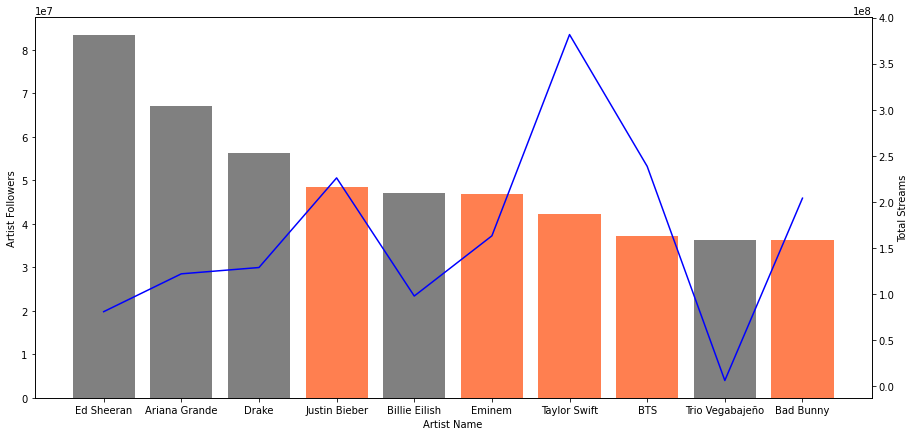

In [99]:
fig = plt.figure(figsize = (15,7))
axes1 = fig.subplots(nrows=1,ncols=1)
axes2 = axes1.twinx()
colors = []
for name in df_top10f['Artist']:
    if name in top10s:
        colors.append('coral')
    else:
        colors.append('grey')
axes1.bar(df_top10f['Artist'],df_top10f['Artist Followers'], color=colors)
axes1.set(ylabel = 'Artist Followers', xlabel = 'Artist Name')
axes2.plot(df_top10f['Artist'],df_top10f['Streams'], color = 'blue')
axes2.set(ylabel = 'Total Streams')

### Question 3.32 (6 marks)
For the group of artists who top both lists (top 10 in number of followers and top 10 in number of streams) as identified from Question 3.31, visualize how columns popularities, speechiness and valence of their songs varies with respect to the release dates of their streams.

In [138]:
#1 Extract relevant columns from processed DF (df2)
#2 create a list of top10 followers from the DF above
#3 create a filtered DF from the  based on common names in both top10s and top10s
#4 For each artist, plot <attribute> vs 'Release Date' where <attributes> are popularities, speechiness and valence

#### 1. Inspecting the processed dataframe df2 and extract relevant columns

In [102]:
df2.columns

Index(['Highest Charting Position', 'Number of Times Charted',
       'Week of Highest Charting', 'Song Name', 'Streams', 'Artist',
       'Artist Followers', 'Song ID', 'Genre', 'Release Date', 'Weeks Charted',
       'Popularity', 'Danceability', 'Energy', 'Loudness', 'Speechiness',
       'Acousticness', 'Liveness', 'Tempo', 'Duration (ms)', 'Valence',
       'Chord'],
      dtype='object')

In [124]:
df_332 = df2[['Artist','Song Name', 'Release Date','Popularity', 'Speechiness', 'Valence']]

In [125]:
df_332

,Artist,Song Name,Release Date,Popularity,Speechiness,Valence
Index,,,,,,
1,Måneskin,Beggin',12/8/2017,100,0.0504,0.589
2,The Kid LAROI,STAY (with Justin Bieber),7/9/2021,99,0.0483,0.478
3,Olivia Rodrigo,good 4 u,5/21/2021,99,0.1540,0.688
4,Ed Sheeran,Bad Habits,6/25/2021,98,0.0348,0.591
5,Lil Nas X,INDUSTRY BABY (feat. Jack Harlow),7/23/2021,96,0.0615,0.894
...,...,...,...,...,...,...
1552,Dua Lipa,New Rules,6/2/2017,79,0.0694,0.608
1553,Jorge & Mateus,Cheirosa - Ao Vivo,10/11/2019,66,0.0851,0.714
1554,Camila Cabello,Havana (feat. Young Thug),1/12/2018,81,0.0300,0.394


#### 2. Create a list of top10 followers from the sorted DF in previous question. Then create a list of artists with top 10 in both streams and followers

In [126]:
top10f = list(df_top10f['Artist'])

In [127]:
print(top10f)
print(top10s)

['Ed Sheeran', 'Ariana Grande', 'Drake', 'Justin Bieber', 'Billie Eilish', 'Eminem', 'Taylor Swift', 'BTS', 'Trio Vegabajeño', 'Bad Bunny']
['Taylor Swift', 'BTS', 'Justin Bieber', 'Lil Uzi Vert', 'Bad Bunny', 'Pop Smoke', 'Juice WRLD', 'Olivia Rodrigo', 'Eminem', 'The Weeknd']


In [128]:
top10fs = []
for name in top10f:
    if name in top10s:
        top10fs.append(name)
top10fs

['Justin Bieber', 'Eminem', 'Taylor Swift', 'BTS', 'Bad Bunny']

#### 3. Create a DF that contains only songs from the artists listed in step 2 above

In [146]:
df_top10fs = df_332[df_332['Artist'].isin(top10fs)]

In [147]:
# each artist will have all their songs listed, checking if they are indeed from the list above:
df_top10fs['Artist'].value_counts()

Taylor Swift     52
Justin Bieber    32
BTS              29
Bad Bunny        28
Eminem           22
Name: Artist, dtype: int64

#### 4. Prepare Data for Plotting 

In [169]:
# it can be seen that Release Date is not in Datetime format
df_top10fs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 163 entries, 9 to 1556
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Artist           163 non-null    object        
 1   Song Name        163 non-null    object        
 2   Release Date     163 non-null    datetime64[ns]
 3   Popularity       163 non-null    int64         
 4   Speechiness      163 non-null    float64       
 5   Valence          163 non-null    float64       
 6   Avg Popularity   163 non-null    float64       
 7   Avg Speechiness  163 non-null    float64       
 8   Avg Valence      163 non-null    float64       
dtypes: datetime64[ns](1), float64(5), int64(1), object(2)
memory usage: 12.7+ KB


In [170]:
#Converting to datetime
df_top10fs['Release Date'] = pd.to_datetime(df_top10fs['Release Date'])

<ipython-input-170-8e2707b31143>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top10fs['Release Date'] = pd.to_datetime(df_top10fs['Release Date'])


In [150]:
df_top10fs

,Artist,Song Name,Release Date,Popularity,Speechiness,Valence
Index,,,,,,
9,Bad Bunny,Yonaguni,2021-06-04,96,0.1180,0.440
13,BTS,Permission to Dance,2021-07-09,95,0.0427,0.646
14,Justin Bieber,Peaches (feat. Daniel Caesar & Giveon),2021-03-19,94,0.1190,0.464
15,BTS,Butter,2021-06-04,95,0.0948,0.695
44,BTS,Dynamite,2020-11-20,89,0.0993,0.737
...,...,...,...,...,...,...
1498,Eminem,Farewell,2020-01-17,61,0.1060,0.467
1500,Eminem,Alfred - Interlude,2020-01-17,57,0.4020,0.914
1501,Eminem,Little Engine,2020-01-17,60,0.2280,0.760


In [153]:
df_top10fs.sort_values(['Artist','Release Date']).head(20)

,Artist,Song Name,Release Date,Popularity,Speechiness,Valence
Index,,,,,,
332,BTS,Boy With Luv (feat. Halsey),2019-04-12,82,0.0965,0.798
938,BTS,ON,2020-02-21,77,0.0987,0.438
1323,BTS,Black Swan,2020-02-21,70,0.0851,0.490
1339,BTS,ON (Feat. Sia),2020-02-21,64,0.0828,0.386
1361,BTS,Filter,2020-02-21,79,0.0626,0.860
1370,BTS,My Time,2020-02-21,74,0.0339,0.664
1381,BTS,Louder than bombs,2020-02-21,72,0.1520,0.485
1382,BTS,UGH!,2020-02-21,72,0.1280,0.333
1383,BTS,00:00 (Zero O’Clock),2020-02-21,72,0.0579,0.196


In [171]:
# Calculating the average values of columns of interest, as songs can be release at the same date
df_top10fs[['Avg Popularity', 'Avg Speechiness', 'Avg Valence']]=df_top10fs.groupby(['Artist', 'Release Date'])['Popularity','Speechiness','Valence'].transform('mean')

<ipython-input-171-cbcd6df67fdc>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_top10fs[['Avg Popularity', 'Avg Speechiness', 'Avg Valence']]=df_top10fs.groupby(['Artist', 'Release Date'])['Popularity','Speechiness','Valence'].transform('mean')
C:\Users\phuon\anaconda3\lib\site-packages\pandas\core\frame.py:3065: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [162]:
df_top10fs.sort_values(['Artist','Release Date']).head(30)

,Artist,Song Name,Release Date,Popularity,Speechiness,Valence,Avg Popularity,Avg Speechiness,Avg Valence
Index,,,,,,,,,
332,BTS,Boy With Luv (feat. Halsey),2019-04-12,82,0.0965,0.798,82.00,0.096500,0.798000
938,BTS,ON,2020-02-21,77,0.0987,0.438,71.40,0.106633,0.453333
1323,BTS,Black Swan,2020-02-21,70,0.0851,0.490,71.40,0.106633,0.453333
1339,BTS,ON (Feat. Sia),2020-02-21,64,0.0828,0.386,71.40,0.106633,0.453333
1361,BTS,Filter,2020-02-21,79,0.0626,0.860,71.40,0.106633,0.453333
1370,BTS,My Time,2020-02-21,74,0.0339,0.664,71.40,0.106633,0.453333
1381,BTS,Louder than bombs,2020-02-21,72,0.1520,0.485,71.40,0.106633,0.453333
1382,BTS,UGH!,2020-02-21,72,0.1280,0.333,71.40,0.106633,0.453333
1383,BTS,00:00 (Zero O’Clock),2020-02-21,72,0.0579,0.196,71.40,0.106633,0.453333


In [172]:
#Extract the relevant columns
df_top10fs_sorted = df_top10fs.sort_values(['Artist','Release Date'])
df_top10fs_sorted = df_top10fs_sorted[['Artist','Release Date','Avg Popularity','Avg Speechiness','Avg Valence']]

In [173]:
df_top10fs_sorted

,Artist,Release Date,Avg Popularity,Avg Speechiness,Avg Valence
Index,,,,,
332,BTS,2019-04-12,82.0,0.096500,0.798000
938,BTS,2020-02-21,71.4,0.106633,0.453333
1323,BTS,2020-02-21,71.4,0.106633,0.453333
1339,BTS,2020-02-21,71.4,0.106633,0.453333
1361,BTS,2020-02-21,71.4,0.106633,0.453333
...,...,...,...,...,...
440,Taylor Swift,2021-04-09,67.4,0.038500,0.451733
441,Taylor Swift,2021-04-09,67.4,0.038500,0.451733
442,Taylor Swift,2021-04-09,67.4,0.038500,0.451733


In [176]:
#Remove duplicated Release Dates
df_top10fs_sorted.drop_duplicates('Release Date', inplace = True)
df_top10fs_sorted

,Artist,Release Date,Avg Popularity,Avg Speechiness,Avg Valence
Index,,,,,
332,BTS,2019-04-12,82.000000,0.096500,0.798000
938,BTS,2020-02-21,71.400000,0.106633,0.453333
946,BTS,2020-07-14,73.000000,0.054200,0.582000
44,BTS,2020-11-20,76.750000,0.187563,0.509750
341,BTS,2021-04-01,81.000000,0.134000,0.314000
15,BTS,2021-06-04,82.500000,0.085050,0.552500
13,BTS,2021-07-09,95.000000,0.042700,0.646000
1109,Bad Bunny,2019-11-21,78.000000,0.188000,0.526000
838,Bad Bunny,2020-02-29,74.555556,0.089433,0.648556


#### *Aggregating all artists without differentiated names

In [223]:
# Create a DF to contain only artists in top 10 of both streams and followers (list top10fs)
df_top10fs2 = df_332[df_332['Artist'].isin(top10fs)]

In [224]:
# Calculate the average required song attributes across all artists by Release Date
df_top10fs2[['Avg Popularity', 'Avg Speechiness', 'Avg Valence']]=df_top10fs2.groupby(['Release Date'])['Popularity','Speechiness','Valence'].transform('mean')

<ipython-input-224-4216efb21f8f>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_top10fs2[['Avg Popularity', 'Avg Speechiness', 'Avg Valence']]=df_top10fs2.groupby(['Release Date'])['Popularity','Speechiness','Valence'].transform('mean')
C:\Users\phuon\anaconda3\lib\site-packages\pandas\core\frame.py:3065: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [225]:
df_top10fs2

,Artist,Song Name,Release Date,Popularity,Speechiness,Valence,Avg Popularity,Avg Speechiness,Avg Valence
Index,,,,,,,,,
9,Bad Bunny,Yonaguni,6/4/2021,96,0.1180,0.440,87.00,0.096033,0.515000
13,BTS,Permission to Dance,7/9/2021,95,0.0427,0.646,95.00,0.042700,0.646000
14,Justin Bieber,Peaches (feat. Daniel Caesar & Giveon),3/19/2021,94,0.1190,0.464,72.70,0.056650,0.427200
15,BTS,Butter,6/4/2021,95,0.0948,0.695,87.00,0.096033,0.515000
44,BTS,Dynamite,11/20/2020,89,0.0993,0.737,76.75,0.187563,0.509750
...,...,...,...,...,...,...,...,...,...
1498,Eminem,Farewell,1/17/2020,61,0.1060,0.467,63.50,0.226094,0.442733
1500,Eminem,Alfred - Interlude,1/17/2020,57,0.4020,0.914,63.50,0.226094,0.442733
1501,Eminem,Little Engine,1/17/2020,60,0.2280,0.760,63.50,0.226094,0.442733


In [234]:
# As each Release Date value now has unique song attibutes, we can remove duplicates
df_top10fs2.drop_duplicates('Release Date', inplace = True)

<ipython-input-234-efbc536ad4f2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top10fs2.drop_duplicates('Release Date', inplace = True)


In [235]:
#Create a new DF to contain relevant information only
df_agg = df_top10fs2[['Release Date', 'Avg Popularity', 'Avg Speechiness', 'Avg Valence']]

In [236]:
df_agg

,Release Date,Avg Popularity,Avg Speechiness,Avg Valence
Index,,,,
9,6/4/2021,87.000000,0.096033,0.515000
13,7/9/2021,95.000000,0.042700,0.646000
14,3/19/2021,72.700000,0.056650,0.427200
44,11/20/2020,76.750000,0.187563,0.509750
119,8/13/2021,0.000000,0.037900,0.437000
192,7/6/2021,83.000000,0.074700,0.231000
200,5/23/2000,84.000000,0.057200,0.760000
310,11/27/2020,72.333333,0.097217,0.407483
328,5/28/2021,76.000000,0.274000,0.848000


#### 5. Plotting

<ipython-input-431-2bf3aca8cda2>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_xticklabels(df_agg['Release Date'], rotation=90)
<ipython-input-431-2bf3aca8cda2>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1].set_xticklabels(df_agg['Release Date'], rotation=90)


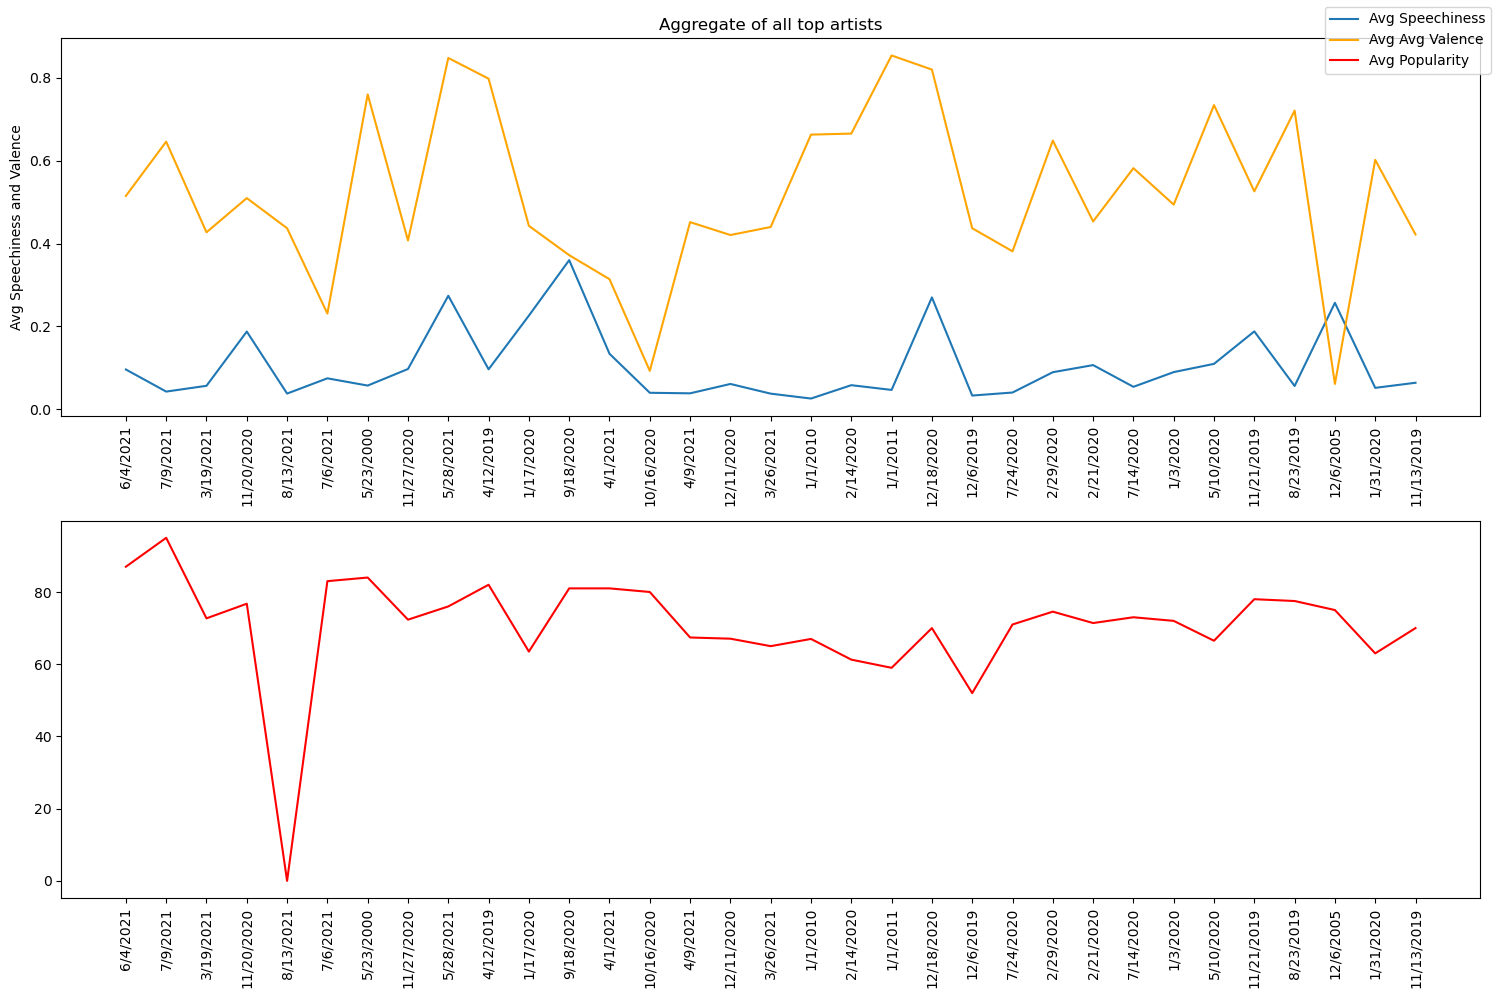

In [431]:
fig_agg = plt.figure(figsize=(15,10))

axes = fig_agg.subplots(nrows=2,ncols=1)
axes[0].set_xticklabels(df_agg['Release Date'], rotation=90)
axes[1].set_xticklabels(df_agg['Release Date'], rotation=90)

axes[0].plot(df_agg['Release Date'], df_agg['Avg Speechiness'], label = 'Avg Speechiness')
axes[0].set(ylabel = 'Avg Speechiness and Valence', title = "Aggregate of all top artists")
axes[0].plot(df_agg['Release Date'], df_agg['Avg Valence'], color = 'orange', label = 'Avg Avg Valence')

axes[1].plot(df_agg['Release Date'], df_agg['Avg Popularity'], label = 'Avg Popularity', color = 'red')

fig_agg.legend(loc='upper right')
fig_agg.tight_layout()

### Question 3.33 (8 marks)
Visualize the trend of popular genres in 2020 by weeks as follows:<br>
1. Select songs that are released in year 2020.<br>
2. Count the number of songs for each distinct genre, and select the 10 most popular genres in the descending order of the number of associated songs.<br>
3. Visualize the trend of these popular genres on a weekly basis.<br>

#### 1. Create a dataframe from the formatted dataframe (df2) to contain relevant columns

In [245]:
df2.columns

Index(['Highest Charting Position', 'Number of Times Charted',
       'Week of Highest Charting', 'Song Name', 'Streams', 'Artist',
       'Artist Followers', 'Song ID', 'Genre', 'Release Date', 'Weeks Charted',
       'Popularity', 'Danceability', 'Energy', 'Loudness', 'Speechiness',
       'Acousticness', 'Liveness', 'Tempo', 'Duration (ms)', 'Valence',
       'Chord'],
      dtype='object')

In [246]:
df_gen = df2[['Song Name','Genre', 'Release Date']]

#### 2. Create a dataframe to contain songs released in 2020 only

In [255]:
df_2020 = df_gen[df_gen['Release Date'].str.contains(r'2020')]

In [258]:
df_2020

,Song Name,Genre,Release Date
Index,,,
11,Levitating (feat. DaBaby),"dance pop, pop, uk pop",10/1/2020
24,Heat Waves,"gauze pop, indietronica, shiver pop",8/7/2020
25,Blinding Lights,"canadian contemporary r&b, canadian pop, pop",3/20/2020
40,DÁKITI,"latin, reggaeton, trap latino",11/27/2020
44,Dynamite,"k-pop, k-pop boy group",11/20/2020
...,...,...,...
1519,Let Me Get Me,"dance pop, pop, post-teen pop",1/10/2020
1520,A Sweeter Place (feat. Kid Cudi),"dance pop, pop, post-teen pop",1/10/2020
1525,Diamonds (with Normani),"houston rap, pop, pop rap, trap queen",1/10/2020


#### 3. Creating a df containing genres and their counts

Create a column to contain the genre counts

In [276]:
df_2020['Genre Count'] = df_2020.groupby('Genre')['Genre'].transform('count')
df_2020.sort_values('Genre Count', ascending = False)
# Note that the Genre Count will show duplicated values - the total count of each genre - on 2 rows of the same genre

<ipython-input-276-d7310547eee4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2020['Genre Count'] = df_2020.groupby('Genre')['Genre'].transform('count')


,Song Name,Genre,Release Date,Genre Count
Index,,,,
495,La Curiosidad,"latin, reggaeton, trap latino",6/12/2020,51.0
838,Yo Perreo Sola,"latin, reggaeton, trap latino",2/29/2020,51.0
1296,Soliá,"latin, reggaeton, trap latino",2/29/2020,51.0
711,YO VISTO ASÍ,"latin, reggaeton, trap latino",11/27/2020,51.0
1348,Puesto Pa' Guerrial,"latin, reggaeton, trap latino",2/29/2020,51.0
...,...,...,...,...
194,Chosen (feat. Ty Dolla $ign),NaN,12/4/2020,NaN
547,Meia Noite (Você tem meu Whatsapp),NaN,12/17/2020,NaN
611,Amor ou o Litrão,NaN,10/16/2020,NaN


Discard rows with duplicate genre, then column 'Song Name' to obtain the target DF

In [277]:
df_genre = df_2020.drop_duplicates('Genre')

In [279]:
df_genre.drop('Song Name', axis = 1, inplace = True)

# df.drop('Index', axis = 1, inplace = True)

C:\Users\phuon\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


Obtain the top 10 genres by sorting and head()

In [290]:
df_genre_sorted = df_genre.sort_values('Genre Count', ascending = False).head(10)

In [291]:
topgen = list(df_genre_sorted['Genre'])
topgen

['latin, reggaeton, trap latino',
 'dance pop, pop, post-teen pop',
 'pop, post-teen pop',
 'melodic rap, philly rap, rap, trap',
 'k-pop, k-pop boy group',
 'chicago rap, melodic rap',
 'canadian pop, pop, post-teen pop',
 'detroit hip hop, hip hop, rap',
 'brooklyn drill',
 'german hip hop']

In order to plot against the week being the x-axis, we need to convert "Release Date" to datetime and obtain the week number from it

In [297]:
#Converting to datetime
df_2020['Release Date'] = pd.to_datetime(df_2020['Release Date'])
df_2020.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783 entries, 11 to 1530
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Song Name     783 non-null    object        
 1   Genre         778 non-null    object        
 2   Release Date  783 non-null    datetime64[ns]
 3   Genre Count   778 non-null    float64       
 4   Week Number   783 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 56.7+ KB


<ipython-input-297-735cd9ded2fe>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2020['Release Date'] = pd.to_datetime(df_2020['Release Date'])


In [298]:
#Obtain week number of the year from Release Date column
df_2020['Week Number'] = df_2020['Release Date'].dt.week
df_2020

<ipython-input-298-c8ecca179222>:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df_2020['Week Number'] = df_2020['Release Date'].dt.week
<ipython-input-298-c8ecca179222>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2020['Week Number'] = df_2020['Release Date'].dt.week


,Song Name,Genre,Release Date,Genre Count,Week Number
Index,,,,,
11,Levitating (feat. DaBaby),"dance pop, pop, uk pop",2020-10-01,8.0,40
24,Heat Waves,"gauze pop, indietronica, shiver pop",2020-08-07,1.0,32
25,Blinding Lights,"canadian contemporary r&b, canadian pop, pop",2020-03-20,15.0,12
40,DÁKITI,"latin, reggaeton, trap latino",2020-11-27,51.0,48
44,Dynamite,"k-pop, k-pop boy group",2020-11-20,24.0,47
...,...,...,...,...,...
1519,Let Me Get Me,"dance pop, pop, post-teen pop",2020-01-10,50.0,2
1520,A Sweeter Place (feat. Kid Cudi),"dance pop, pop, post-teen pop",2020-01-10,50.0,2
1525,Diamonds (with Normani),"houston rap, pop, pop rap, trap queen",2020-01-10,5.0,2


Next, after processing the week number, we obtain a new DF which only contains the top genres as listed above

In [300]:
df_topgenre = df_2020[df_2020['Genre'].isin(topgen)]

In [301]:
df_topgenre

,Song Name,Genre,Release Date,Genre Count,Week Number
Index,,,,,
40,DÁKITI,"latin, reggaeton, trap latino",2020-11-27,51.0,48
44,Dynamite,"k-pop, k-pop boy group",2020-11-20,24.0,47
92,positions,"dance pop, pop, post-teen pop",2020-10-30,50.0,44
122,LA NOCHE DE ANOCHE,"latin, reggaeton, trap latino",2020-11-27,51.0,48
158,What You Know Bout Love,brooklyn drill,2020-07-03,19.0,27
...,...,...,...,...,...
1515,People You Know,"dance pop, pop, post-teen pop",2020-01-10,50.0,2
1519,Let Me Get Me,"dance pop, pop, post-teen pop",2020-01-10,50.0,2
1520,A Sweeter Place (feat. Kid Cudi),"dance pop, pop, post-teen pop",2020-01-10,50.0,2


In [303]:
#Inspecting the genres, we see that they agree with the top 10 counts
df_topgenre.value_counts(['Genre'])

Genre                             
latin, reggaeton, trap latino         51
dance pop, pop, post-teen pop         50
pop, post-teen pop                    32
melodic rap, philly rap, rap, trap    31
k-pop, k-pop boy group                24
chicago rap, melodic rap              23
canadian pop, pop, post-teen pop      20
detroit hip hop, hip hop, rap         19
brooklyn drill                        19
german hip hop                        17
dtype: int64

In [304]:
df_genre.sort_values('Genre Count', ascending = False).head(10)

,Genre,Release Date,Genre Count
Index,,,
40,"latin, reggaeton, trap latino",11/27/2020,51.0
92,"dance pop, pop, post-teen pop",10/30/2020,50.0
425,"pop, post-teen pop",12/11/2020,32.0
1067,"melodic rap, philly rap, rap, trap",3/13/2020,31.0
44,"k-pop, k-pop boy group",11/20/2020,24.0
385,"chicago rap, melodic rap",7/10/2020,23.0
337,"canadian pop, pop, post-teen pop",9/18/2020,20.0
334,"detroit hip hop, hip hop, rap",1/17/2020,19.0
158,brooklyn drill,7/3/2020,19.0


In [309]:
# Create weekly count for each genre
df_topgenre['Weekly Count'] = df_topgenre.groupby('Week Number')['Genre'].transform('count')
df_topgenre

<ipython-input-309-3b87e421147f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_topgenre['Weekly Count'] = df_topgenre.groupby('Week Number')['Genre'].transform('count')


,Song Name,Genre,Release Date,Genre Count,Week Number,Weekly Count
Index,,,,,,
40,DÁKITI,"latin, reggaeton, trap latino",2020-11-27,51.0,48,18
44,Dynamite,"k-pop, k-pop boy group",2020-11-20,24.0,47,10
92,positions,"dance pop, pop, post-teen pop",2020-10-30,50.0,44,14
122,LA NOCHE DE ANOCHE,"latin, reggaeton, trap latino",2020-11-27,51.0,48,18
158,What You Know Bout Love,brooklyn drill,2020-07-03,19.0,27,17
...,...,...,...,...,...,...
1515,People You Know,"dance pop, pop, post-teen pop",2020-01-10,50.0,2,11
1519,Let Me Get Me,"dance pop, pop, post-teen pop",2020-01-10,50.0,2,11
1520,A Sweeter Place (feat. Kid Cudi),"dance pop, pop, post-teen pop",2020-01-10,50.0,2,11


In [310]:
# As each genre now has unique weekly count, we can remove duplicates
df_topgenre2 = df_topgenre.drop_duplicates(['Genre','Weekly Count'])

In [312]:
# Create a new DF to contain only relevant columns
df_topgenre_final = df_topgenre2[['Genre','Week Number','Weekly Count']]

In [314]:
df_topgenre_final.sort_values(['Week Number'])

,Genre,Week Number,Weekly Count
Index,,,
1082,"dance pop, pop, post-teen pop",2,11
334,"detroit hip hop, hip hop, rap",3,18
1426,"pop, post-teen pop",5,3
1287,"dance pop, pop, post-teen pop",6,3
1276,"latin, reggaeton, trap latino",6,3
528,"canadian pop, pop, post-teen pop",7,18
1291,"dance pop, pop, post-teen pop",8,16
938,"k-pop, k-pop boy group",8,16
1357,"melodic rap, philly rap, rap, trap",9,21


Next, a 2D heatmap can be drawn with:<br>
x-axis: week number<br>
y-axis: the top genres<br>
count value: group and count by week number

In [324]:
#creating a 2D pivoted dataframe for heatmap
df_topgenre_final2 = df_topgenre_final.pivot("Genre", "Week Number", "Weekly Count")

In [325]:
# as a genre is not released every week, there are NaN values on a week that a genre is not released
# this means the value is zero, we replace the NaN with zero:
df_topgenre_final2.fillna(0)

Week Number,2,3,5,6,7,8,9,10,11,17,...,31,38,40,42,44,47,48,49,50,51
Genre,,,,,,,,,,,,,,,,,,,,,
brooklyn drill,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"canadian pop, pop, post-teen pop",0.0,0.0,0.0,0.0,18.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
"chicago rap, melodic rap",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,16.0,0.0
"dance pop, pop, post-teen pop",11.0,0.0,0.0,3.0,0.0,16.0,0.0,19.0,0.0,0.0,...,0.0,0.0,1.0,0.0,14.0,10.0,18.0,0.0,0.0,0.0
"detroit hip hop, hip hop, rap",0.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
german hip hop,0.0,0.0,0.0,0.0,0.0,0.0,21.0,0.0,0.0,0.0,...,3.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"k-pop, k-pop boy group",0.0,0.0,0.0,0.0,0.0,16.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0
"latin, reggaeton, trap latino",0.0,0.0,0.0,3.0,0.0,0.0,21.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,10.0,18.0,0.0,0.0,0.0
"melodic rap, philly rap, rap, trap",0.0,0.0,0.0,0.0,0.0,0.0,21.0,19.0,12.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [447]:
# Plotting using seaborn heatmap
# white spaces represent weeks when a certain genre is not released


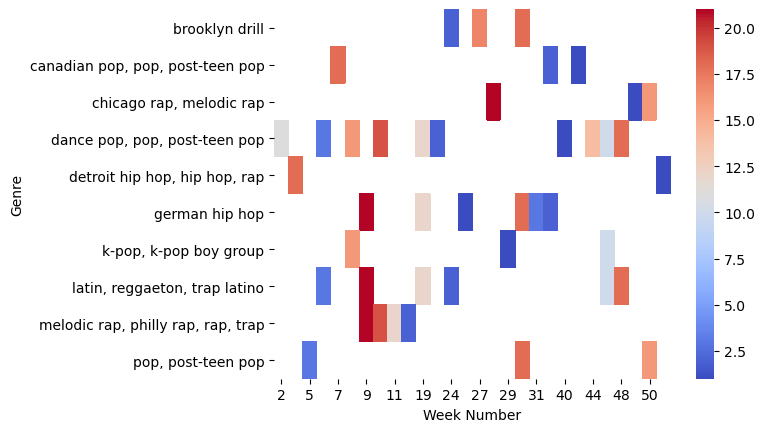

In [448]:
ax = sns.heatmap(df_topgenre_final2, cmap = 'coolwarm')

### Question 3.34  (4 marks)

In this question, we wish to use a chart to answer a data science question: what decides popularity? <br>
i.e., is popularity correlated to any of the following attributes?<br>
- Danceability
- Energy
- Loudness
- Speechiness
- Acousticness
- Liveness
- Tempo
- Duration (ms)
- Valence

#### 1. Creating a df containing relevant columns from the processed DF df_2

In [363]:
df_334 = df2[['Popularity', 'Danceability', 'Energy', 'Loudness', 'Speechiness',
       'Acousticness', 'Liveness', 'Tempo', 'Duration (ms)', 'Valence']]

In [373]:
df_334.head()

,Popularity,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence
Index,,,,,,,,,,
1,100,0.714,0.800,-4.808,0.0504,0.1270,0.3590,134.002,211560,0.589
2,99,0.591,0.764,-5.484,0.0483,0.0383,0.1030,169.928,141806,0.478
3,99,0.563,0.664,-5.044,0.1540,0.3350,0.0849,166.928,178147,0.688
4,98,0.808,0.897,-3.712,0.0348,0.0469,0.3640,126.026,231041,0.591
5,96,0.736,0.704,-7.409,0.0615,0.0203,0.0501,149.995,212000,0.894


#### 2. Plotting using seaborn pairgrid

Observations from the first column of the grid: <br>
- Most factors do not show strong linear relationship with popularity
- The 2 factors with relatively greater positive relationship with popularity are 'Energy' and 'Loudness'

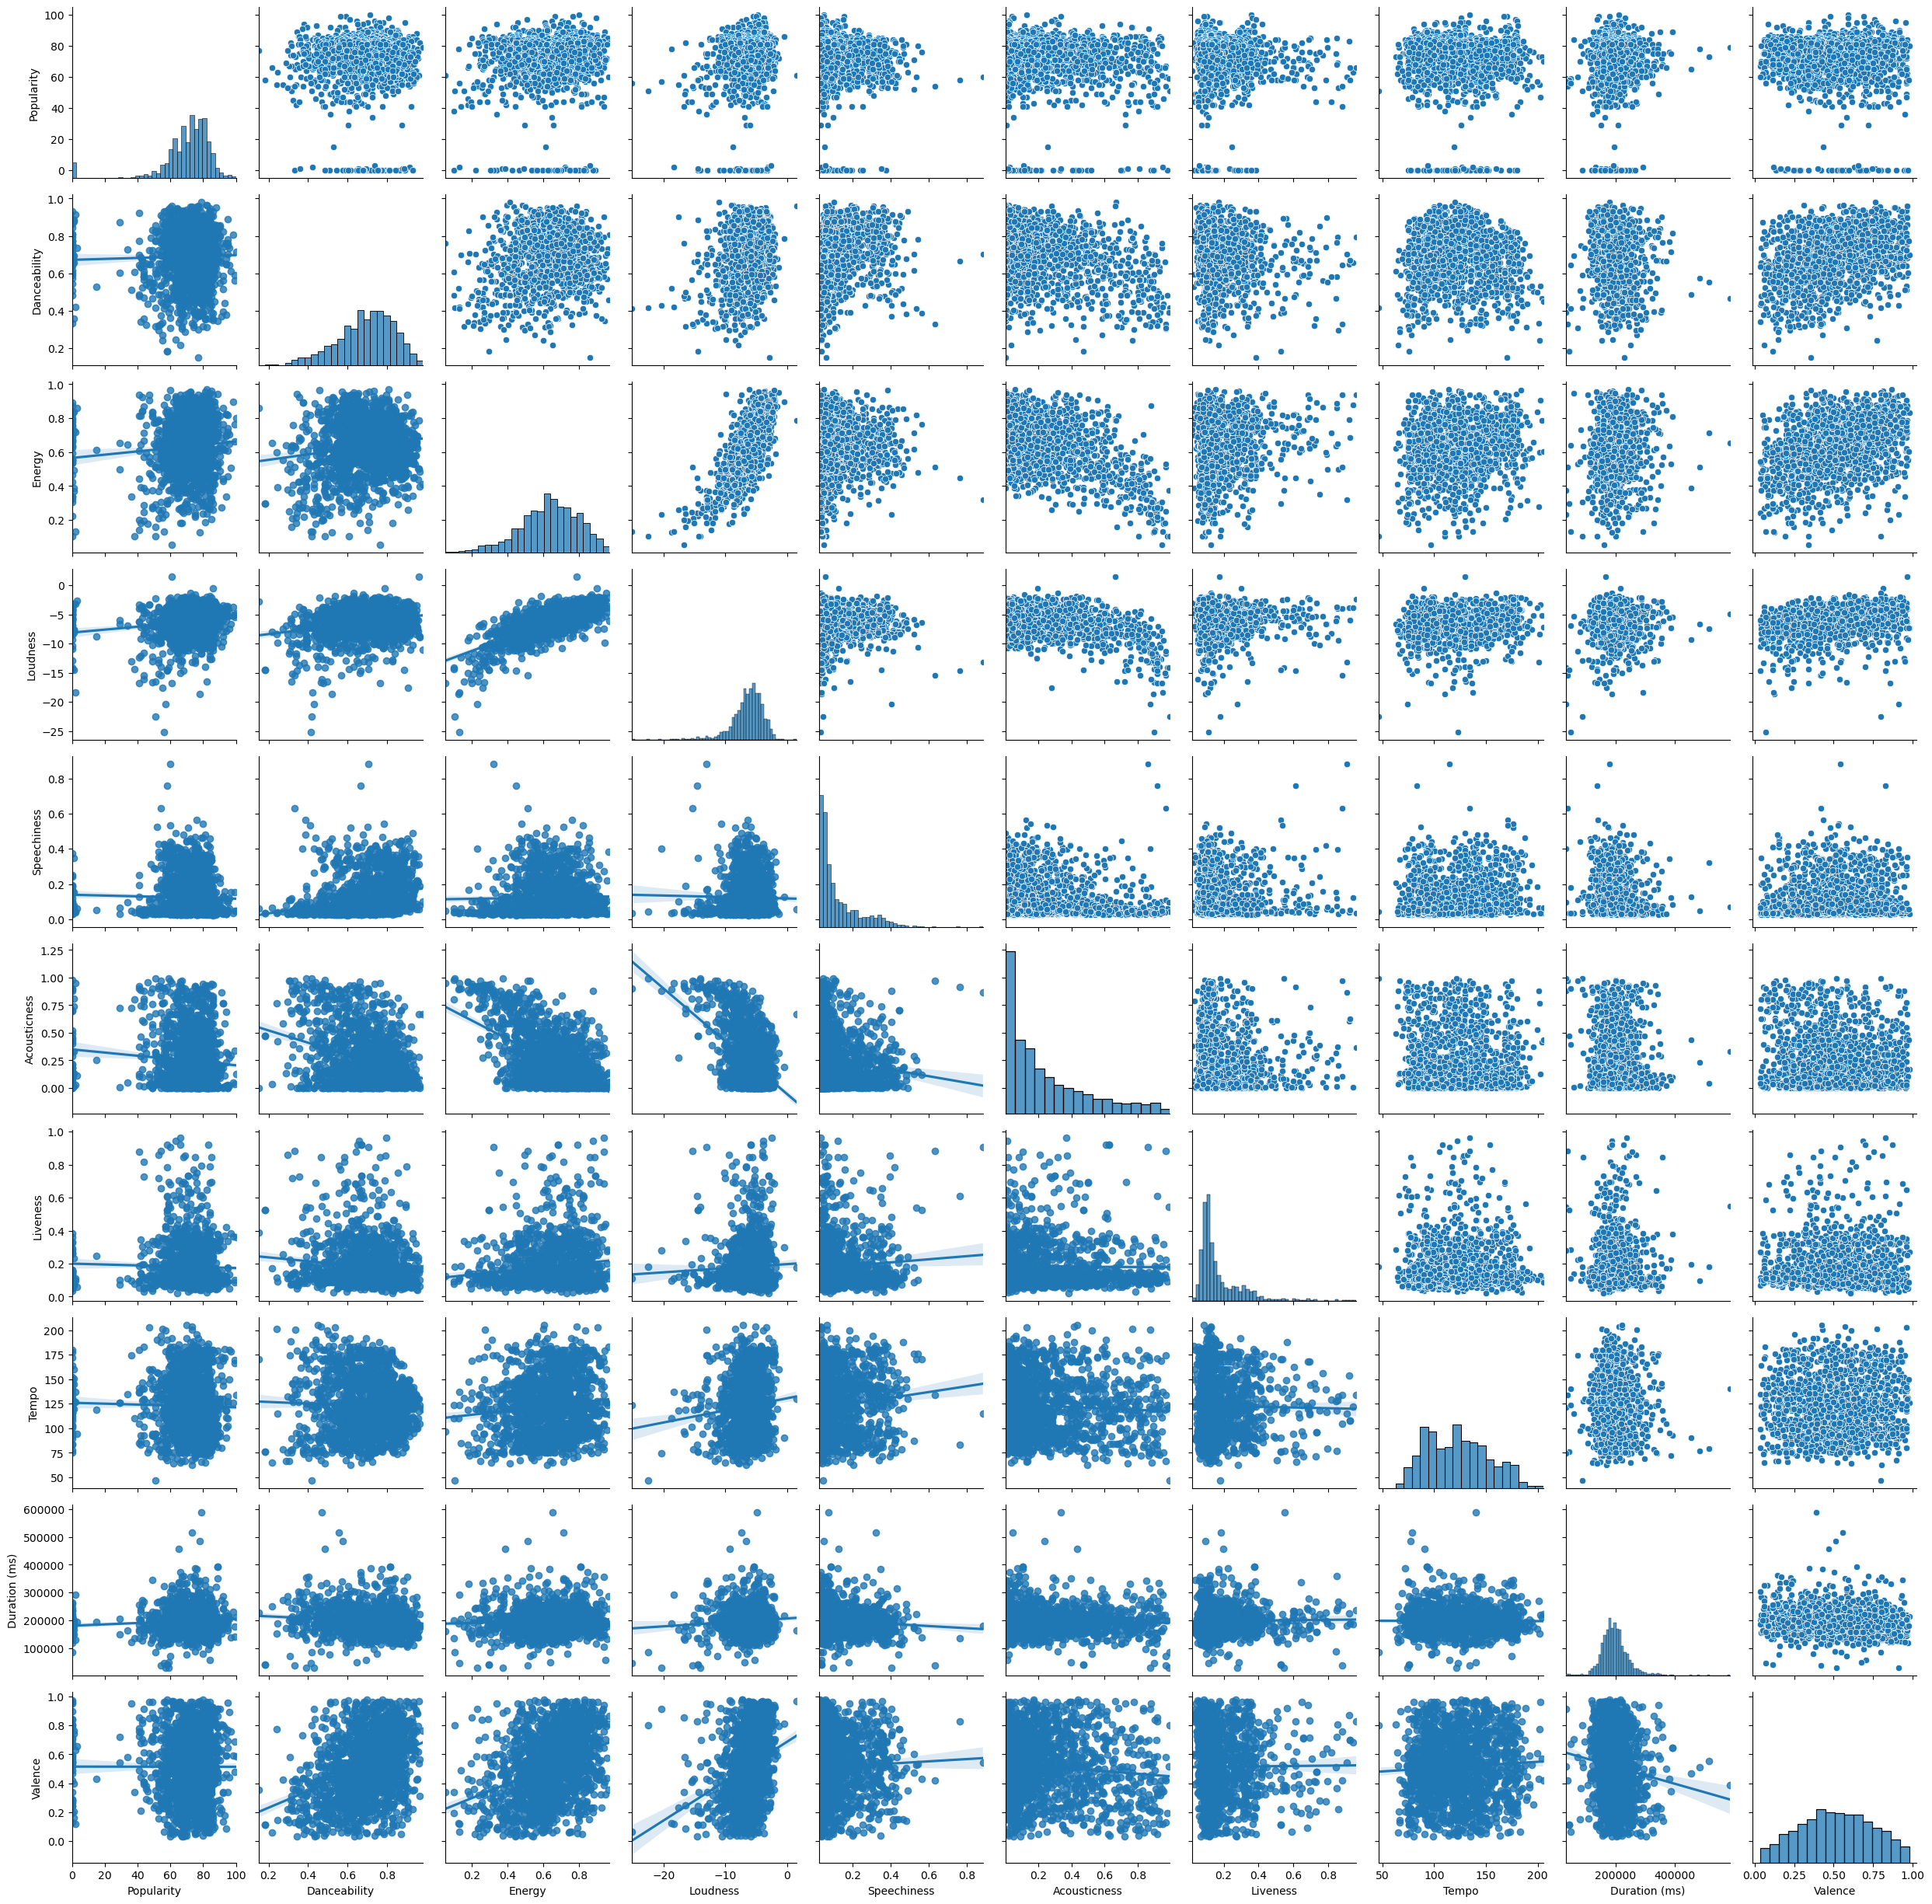

In [394]:
g = sns.PairGrid(df_334)
g.map_lower(sns.regplot)
g.map_diag(sns.histplot)
g.map_upper(sns.scatterplot)